In [1]:
try:
    import requests
except:
    print("If you read this message, it means you need to install the package requests by using pip3 install requests --user")
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio as play_wave
from IPython.display import display
import getpass
from sklearn.decomposition import PCA
markers=",ov^8sp*hDPX"

csv_data="../data/CFdata.csv"

In [2]:

token= getpass.getpass("Please copy-paste your token from here https://developer.spotify.com/console/get-audio-features-several-tracks/ \n")
headers={"Authorization": "Bearer %s"%token}

Please copy-paste your token from here https://developer.spotify.com/console/get-audio-features-several-tracks/ 
········


# Data preparation
## Import CSV downloaded from google drive with Pandas
Pandas is a wonderful library that allows us to simply import and work with structured data.
For example, saving the Google Spreadsheet as a csv, we can then import it with a single command

In [3]:
df=pd.read_csv(csv_data, delimiter=",")
display(df)

,Artist,Songs,Youtube,Buccoli,Simeon,ema.inta,Fanio,Mori,Virginia,Sebastian,...,Nicola,Cecilia,Luca,Carmelo,Matteo,Paolo,Cedric,Davide,Phil,Dario
0,Icona Pop,I love it,https://www.youtube.com/watch?v=UxxajLWwzqY,2,1,2,2,1,2,2,...,1,2,1,2,2,1,1,1,2,1
1,Avicii Nicky Romero,I Could Be The One,https://www.youtube.com/watch?v=bek1y2uiQGA,0,2,1,0,0,1,1,...,1,0,-1,1,0,0,0,2,2,2
2,Alice Merton,Lash Out,https://www.youtube.com/watch?v=Sd6QnOR0T6c,1,0,2,0,2,1,0,...,1,2,0,0,2,0,0,0,2,0
3,Tame Impala,Eventually,https://youtu.be/Fkqu1DKyIX0,-1,0,0,2,0,0,0,...,0,0,2,0,-1,2,0,2,2,0
4,Arctic Monkeys,Arabella,https://youtu.be/Jn6-TItCazo,0,0,1,2,2,2,2,...,1,0,2,0,0,0,0,2,2,0
5,Franz Ferdinand,No You Girls,https://www.youtube.com/watch?v=25sBhhOR4lw&li...,0,0,2,0,0,2,2,...,0,2,2,2,1,1,0,0,2,2
6,The Killers,Mr. Brightside,https://www.youtube.com/watch?v=gGdGFtwCNBE,2,0,2,0,2,2,2,...,2,2,2,2,2,1,0,2,2,2
7,alt-J,Breezeblocks,https://www.youtube.com/watch?v=rVeMiVU77wo&li...,0,0,0,1,0,0,0,...,0,0,2,2,0,1,0,2,2,0
8,David Bowie,Let's Dance,https://www.youtube.com/watch?v=VbD_kBJc_gI,2,0,2,1,0,1,2,...,2,1,-1,2,1,2,1,0,2,2
9,George Ezra,Paradise,https://www.youtube.com/watch?v=XOwihbur34E,-1,2,1,0,2,0,0,...,0,2,2,0,0,0,0,1,2,0


## Separate people's names from tracks and rates
Now, let's put people's name in a list, the tracks' names and artists in a datafrane and let's export the rates in a matrix

In [4]:
people=df.columns[3:].tolist()
tracks=df.iloc[:,:2]
rates=df.iloc[:,3:].values.astype(np.float32)
print(people)
print(rates)
display(tracks)


['Buccoli', 'Simeon', 'ema.inta', 'Fanio', 'Mori', 'Virginia', 'Sebastian', 'Eleonora', 'Nicola', 'Cecilia', 'Luca', 'Carmelo', 'Matteo', 'Paolo', 'Cedric', 'Davide', 'Phil', 'Dario']
[[ 2.  1.  2.  2.  1.  2.  2.  2.  1.  2.  1.  2.  2.  1.  1.  1.  2.  1.]
 [ 0.  2.  1.  0.  0.  1.  1.  2.  1.  0. -1.  1.  0.  0.  0.  2.  2.  2.]
 [ 1.  0.  2.  0.  2.  1.  0.  0.  1.  2.  0.  0.  2.  0.  0.  0.  2.  0.]
 [-1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  2.  0. -1.  2.  0.  2.  2.  0.]
 [ 0.  0.  1.  2.  2.  2.  2.  2.  1.  0.  2.  0.  0.  0.  0.  2.  2.  0.]
 [ 0.  0.  2.  0.  0.  2.  2.  2.  0.  2.  2.  2.  1.  1.  0.  0.  2.  2.]
 [ 2.  0.  2.  0.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  0.  2.  2.  2.]
 [ 0.  0.  0.  1.  0.  0.  0.  2.  0.  0.  2.  2.  0.  1.  0.  2.  2.  0.]
 [ 2.  0.  2.  1.  0.  1.  2.  1.  2.  1. -1.  2.  1.  2.  1.  0.  2.  2.]
 [-1.  2.  1.  0.  2.  0.  0.  0.  0.  2.  2.  0.  0.  0.  0.  1.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0. -1.  0. 

,Artist,Songs
0,Icona Pop,I love it
1,Avicii Nicky Romero,I Could Be The One
2,Alice Merton,Lash Out
3,Tame Impala,Eventually
4,Arctic Monkeys,Arabella
5,Franz Ferdinand,No You Girls
6,The Killers,Mr. Brightside
7,alt-J,Breezeblocks
8,David Bowie,Let's Dance
9,George Ezra,Paradise


# Get the ids of the tracks on Spotify and import their features
In order to have a content-based description of the tracks, we can use Spotify's APIs to get audio features.
First, we use the search apis to look for Spotify ids for each track

In [5]:
ids=[]
url="https://api.spotify.com/v1/search"

for i, track in tracks.iterrows():
    params={"q": "%s %s"%(track.Artist, track.Songs), "type": "track"}
    req=requests.get(url=url, params=params,headers=headers)
    assert req.status_code==200, req.content
    answer=req.json()
    items=answer["tracks"]["items"]
    first_result=items[0]
    ids.append(first_result["id"])
   
print(ids)

['2U8NXPTXZWG2O0ye2sYRiH', '1sh6lL6cmlcwhqZKGiKBua', '3hHsgoH0OOkIVsUBU3H4g6', '5M4yti0QxgqJieUYaEXcpw', '7nzsY8vlnKdvGOEE0rjAXZ', '4VP8QiCeaZq8BeTIUrMQOG', '7d8GetOsjbxYnlo6Y9e5Kw', '7gARZ2i5u5DHC1b1n1fML5', '3ix6K4wZY29bCujrSznwFZ', '38zwkK6TtTjIW9tpYBfZ3D', '305tGJy16yTTFe6Ya9nMKJ', '68IBz8C8oFUIVC4Xgf0f0g', '5fpj84RsT9cOTfWUCxBTXu', '39rHfrVqCX6A55GF7uOZSC', '2Fxmhks0bxGSBdJ92vM42m', '1ySdjlU5Vc24w81xam2MHR']


Then, we use audio-features with the set of ids to download the features and put them in another dataframe.
We then consider only those columns that are real features, as seen below

In [9]:
url="https://api.spotify.com/v1/audio-features"
params={"ids":",".join(ids)}
req=requests.get(url=url, params=params, headers=headers)
audio_features=req.json()["audio_features"]
df_features=pd.DataFrame(audio_features)
display(df_features)

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.00952,https://api.spotify.com/v1/audio-analysis/2U8N...,0.711,157153,0.906,2U8NXPTXZWG2O0ye2sYRiH,0.000016,8,0.1530,-2.671,1,0.0284,125.916,4,https://api.spotify.com/v1/tracks/2U8NXPTXZWG2...,audio_features,spotify:track:2U8NXPTXZWG2O0ye2sYRiH,0.824
1,0.33800,https://api.spotify.com/v1/audio-analysis/1sh6...,0.507,208316,0.799,1sh6lL6cmlcwhqZKGiKBua,0.000124,6,0.3140,-3.718,0,0.0368,127.943,4,https://api.spotify.com/v1/tracks/1sh6lL6cmlcw...,audio_features,spotify:track:1sh6lL6cmlcwhqZKGiKBua,0.623
2,0.02640,https://api.spotify.com/v1/audio-analysis/3hHs...,0.744,194520,0.770,3hHsgoH0OOkIVsUBU3H4g6,0.000013,9,0.1330,-4.071,0,0.0531,128.005,4,https://api.spotify.com/v1/tracks/3hHsgoH0OOkI...,audio_features,spotify:track:3hHsgoH0OOkIVsUBU3H4g6,0.901
3,0.01580,https://api.spotify.com/v1/audio-analysis/5M4y...,0.424,318591,0.615,5M4yti0QxgqJieUYaEXcpw,0.000389,9,0.0844,-6.217,0,0.0325,77.935,4,https://api.spotify.com/v1/tracks/5M4yti0QxgqJ...,audio_features,spotify:track:5M4yti0QxgqJieUYaEXcpw,0.155
4,0.02020,https://api.spotify.com/v1/audio-analysis/7nzs...,0.579,207357,0.558,7nzsY8vlnKdvGOEE0rjAXZ,0.000001,2,0.2120,-6.986,1,0.0895,179.949,4,https://api.spotify.com/v1/tracks/7nzsY8vlnKdv...,audio_features,spotify:track:7nzsY8vlnKdvGOEE0rjAXZ,0.506
5,0.00860,https://api.spotify.com/v1/audio-analysis/4VP8...,0.677,223787,0.916,4VP8QiCeaZq8BeTIUrMQOG,0.000077,2,0.0967,-4.102,0,0.0296,104.780,4,https://api.spotify.com/v1/tracks/4VP8QiCeaZq8...,audio_features,spotify:track:4VP8QiCeaZq8BeTIUrMQOG,0.878
6,0.00113,https://api.spotify.com/v1/audio-analysis/7d8G...,0.352,222107,0.928,7d8GetOsjbxYnlo6Y9e5Kw,0.000000,1,0.0987,-3.710,1,0.0758,148.026,4,https://api.spotify.com/v1/tracks/7d8GetOsjbxY...,audio_features,spotify:track:7d8GetOsjbxYnlo6Y9e5Kw,0.239
7,0.11800,https://api.spotify.com/v1/audio-analysis/7gAR...,0.569,227080,0.645,7gARZ2i5u5DHC1b1n1fML5,0.001140,5,0.1460,-7.368,1,0.0387,74.985,4,https://api.spotify.com/v1/tracks/7gARZ2i5u5DH...,audio_features,spotify:track:7gARZ2i5u5DHC1b1n1fML5,0.247
8,0.01250,https://api.spotify.com/v1/audio-analysis/3ix6...,0.654,457676,0.743,3ix6K4wZY29bCujrSznwFZ,0.027200,10,0.1530,-7.440,0,0.0605,114.846,4,https://api.spotify.com/v1/tracks/3ix6K4wZY29b...,audio_features,spotify:track:3ix6K4wZY29bCujrSznwFZ,0.632
9,0.20900,https://api.spotify.com/v1/audio-analysis/38zw...,0.642,222045,0.881,38zwkK6TtTjIW9tpYBfZ3D,0.000000,11,0.2100,-3.537,1,0.0393,138.030,4,https://api.spotify.com/v1/tracks/38zwkK6TtTjI...,audio_features,spotify:track:38zwkK6TtTjIW9tpYBfZ3D,0.913


In [8]:
columns_fts=['acousticness', 'danceability', 'energy',  'instrumentalness', 'liveness', 'loudness',  
                    'tempo', 'valence']
features=df_features.loc[:, columns_fts].values
display(features)

array([[ 9.52000e-03,  7.11000e-01,  9.06000e-01,  1.64000e-05,
         1.53000e-01, -2.67100e+00,  1.25916e+02,  8.24000e-01],
       [ 3.38000e-01,  5.07000e-01,  7.99000e-01,  1.24000e-04,
         3.14000e-01, -3.71800e+00,  1.27943e+02,  6.23000e-01],
       [ 2.64000e-02,  7.44000e-01,  7.70000e-01,  1.27000e-05,
         1.33000e-01, -4.07100e+00,  1.28005e+02,  9.01000e-01],
       [ 1.58000e-02,  4.24000e-01,  6.15000e-01,  3.89000e-04,
         8.44000e-02, -6.21700e+00,  7.79350e+01,  1.55000e-01],
       [ 2.02000e-02,  5.79000e-01,  5.58000e-01,  1.26000e-06,
         2.12000e-01, -6.98600e+00,  1.79949e+02,  5.06000e-01],
       [ 8.60000e-03,  6.77000e-01,  9.16000e-01,  7.68000e-05,
         9.67000e-02, -4.10200e+00,  1.04780e+02,  8.78000e-01],
       [ 1.13000e-03,  3.52000e-01,  9.28000e-01,  0.00000e+00,
         9.87000e-02, -3.71000e+00,  1.48026e+02,  2.39000e-01],
       [ 1.18000e-01,  5.69000e-01,  6.45000e-01,  1.14000e-03,
         1.46000e-01, -7.36800e+0

# Let's summarize

In [10]:
print("We have %d people who rated %d songs"%(len(people),tracks.shape[0]))
print("Indeed, the shape of our rating matrix is %s"%(str(rates.shape)))
print("For each track we extracted %d features from Spotify leading to a matrix shaped %s"%(len(columns_fts),str(features.shape)))

We have 18 people who rated 16 songs
Indeed, the shape of our rating matrix is (16, 18)
For each track we extracted 8 features from Spotify leading to a matrix shaped (16, 8)


# Principal Component Analysis (PCA)
## Content-based PCA
Now what can we do about it? First, we can use Principal Component Analysis techniques to reduce the feature-space of songs from 8 dimensions to 2 dimensions, drawn as those who best fits the data in features.

Before doing anything, let's choose a song and guess: name two songs in the list that are similar in your opinion

In [11]:
pca_ft=PCA(n_components=2, whiten=True)
features_2=pca_ft.fit_transform(features)

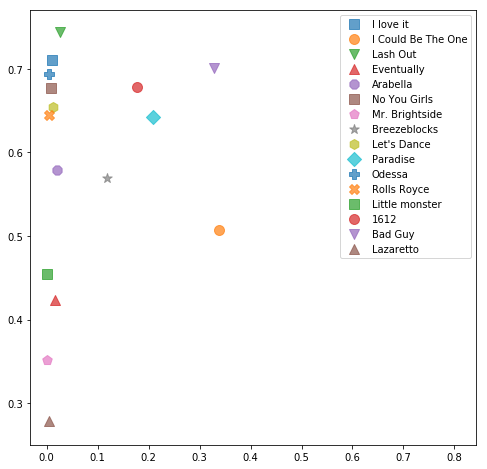

In [12]:
plt.figure(figsize=(8,8))
for i, track in tracks.iterrows():
    plt.scatter(features[i,0], features[i,1], s=100, alpha=0.7, marker=markers[i%len(markers)], label=track.Songs)
plt.legend()
range_x=features[:,0].max()-features[:,0].min()
plt.xlim([features[:,0].min()-range_x/10, features[:,0].max()+1.5*range_x])
plt.show()

How the different features contribute to each component?

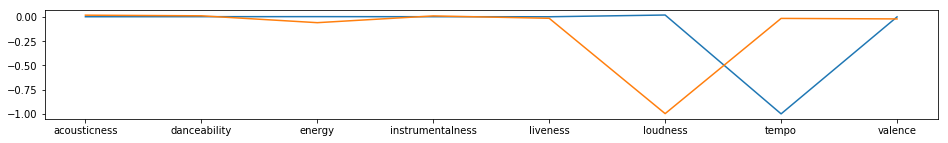

In [13]:
plt.figure(figsize=(16,2))
for component in pca_ft.components_:
    plt.plot(component)
plt.xticks(np.arange(len(columns_fts)), columns_fts)
plt.show()

## Context-based PCA
Actually, we have another way to describe songs: we can benefits from people rates.
Let's apply PCA to the rates, and let's summarize songs into 2 dimensions

Can you first guess what will appear?

In [14]:
pca_trackpeople=PCA(n_components=2, whiten=True)
tracks_2=pca_trackpeople.fit_transform(rates)

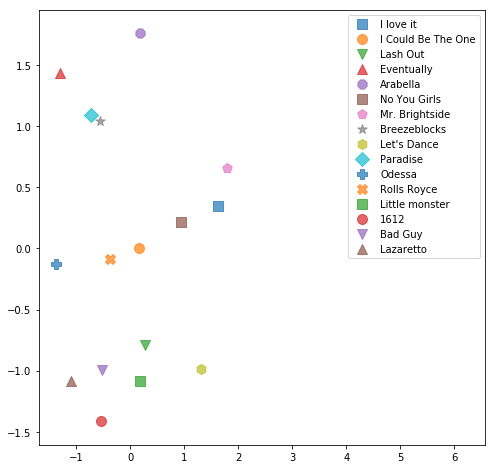

In [15]:
plt.figure(figsize=(8,8))
for i, track in tracks.iterrows():
    plt.scatter(tracks_2[i,0], tracks_2[i,1], s=100, marker=markers[i%len(markers)], alpha=0.7, label=track.Songs)
plt.legend()
range_x=tracks_2[:,0].max()-tracks_2[:,0].min()
plt.xlim([tracks_2[:,0].min()-range_x/10, tracks_2[:,0].max()+1.5*range_x])
plt.show()

How the different PEOPLE contribute to each component?

In [ ]:
plt.figure(figsize=(16,2))
for component in pca_trackpeople.components_:
    plt.plot(component)
plt.xticks(np.arange(len(people)), people)
plt.show()

# YOUR TURN
**But we can also invert the process. How much listening habits describe people? Can we draw people in a 2D world?**

['Buccoli', 'Simeon', 'ema.inta', 'Fanio', 'Mori', 'Virginia', 'Sebastian', 'Eleonora', 'Nicola', 'Cecilia', 'Luca', 'Carmelo', 'Matteo', 'Paolo', 'Cedric', 'Davide', 'Phil', 'Dario']


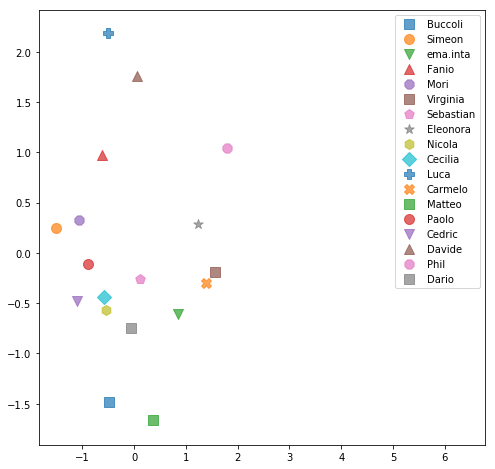

In [20]:
print(people)
pca_peopletrack=PCA(n_components=2, whiten=True)
people_2=pca_peopletrack.fit_transform(rates.T)
plt.figure(figsize=(8,8))
for i, person in enumerate(people):
    plt.scatter(people_2[i,0], people_2[i,1], s=100, 
                marker=markers[i%len(markers)], alpha=0.7, label=person)
plt.legend()
range_x=people_2[:,0].max()-people_2[:,0].min()
plt.xlim([people_2[:,0].min()-range_x/10, people_2[:,0].max()+1.5*range_x])
plt.show()

In [19]:
people_2.shape

(18, 2)